In [ ]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install python-louvain

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Using Post: CPython's optimization for doubly linked lists in deque (amortizes 200% link memory overhead)
URL: https://www.reddit.com/r/Python/comments/1k5nxvt/cpythons_optimization_for_doubly_linked_lists_in/


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Nodes: 8
Edges: 8


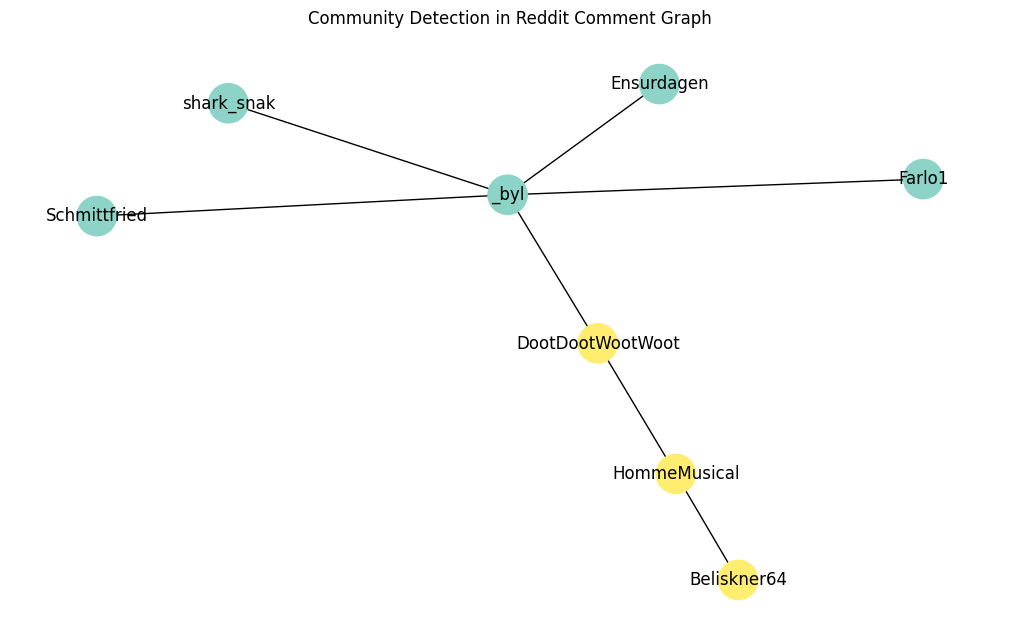

In [ ]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

client_id = ''
client_secret = ''
user_agent = 'MyRedditApp/1.0 by yourusername'

# Create a Reddit instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)


# ✅ 2. Pick subreddit and get top posts
subreddit = reddit.subreddit("Python")
top_posts = list(subreddit.hot(limit=10))

# ✅ 3. Choose the post with most comments
most_engaging = max(top_posts, key=lambda post: post.num_comments)

print(f"Using Post: {most_engaging.title}")
print(f"URL: {most_engaging.url}")

submission = reddit.submission(id=most_engaging.id)
submission.comments.replace_more(limit=None)

# ✅ 4. Build reply graph
G = nx.DiGraph()

for comment in submission.comments.list():
    if comment.author:
        if comment.parent_id.startswith("t1_"):
            try:
                parent = reddit.comment(id=comment.parent_id.split('_')[1])
                if parent.author:
                    G.add_edge(str(parent.author), str(comment.author))
            except:
                continue
        elif comment.parent_id.startswith("t3_"):
            G.add_edge(str(submission.author), str(comment.author))

# ✅ 5. Check the graph
print(f"Nodes: {len(G.nodes())}")
print(f"Edges: {len(G.edges())}")

# ✅ 6. Community detection
G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)

# ✅ 7. Visualization
pos = nx.spring_layout(G_undirected, seed=42)
colors = [partition.get(node) for node in G_undirected.nodes()]
plt.figure(figsize=(10, 6))
nx.draw(
    G_undirected,
    pos,
    node_color=colors,
    node_size=800,
    with_labels=True,
    cmap=plt.cm.Set3,
)
plt.title("Community Detection in Reddit Comment Graph")
plt.show()


In [ ]:
import praw
import pandas as pd



# Subreddit and post fetch limit
subreddit = reddit.subreddit("Python")
posts = list(subreddit.hot(limit=50))  # Fetch 50 posts (adjust as needed)

# Create a list to store post data
post_data = []

for post in posts:
    post_data.append({
        "title": post.title,
        "author": str(post.author),
        "score": post.score,
        "num_comments": post.num_comments,
        "engagement": post.score + post.num_comments,  # Total engagement
        "url": post.url
    })

# Create DataFrame
df = pd.DataFrame(post_data)

# Show the first few rows
print(df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title         author  score  \
0  Sunday Daily Thread: What's everyone working o...  AutoModerator      1   
1  Thursday Daily Thread: Python Careers, Courses...  AutoModerator      1   
2  Advanced Alchemy 1.0 - A framework agnostic li...         cofin_     88   
3    Jonq! Your python wrapper for jq thats readable   papersashimi      4   
4     Goombay: For all your sequence alignment needs      Kind-Kure     13   

   num_comments  engagement                                                url  
0             0           1  https://www.reddit.com/r/Python/comments/1k39v...  
1             0           1  https://www.reddit.com/r/Python/comments/1k6ec...  
2             1          89  https://www.reddit.com/r/Python/comments/1k5z5...  
3             0           4  https://www.reddit.com/r/Python/comments/1k6es...  
4             0          13  https://www.reddit.com/r/Python/comments/1k625...  


In [ ]:
# Get the top 10 most engaged posts
top_posts = df.sort_values("engagement", ascending=False).head(10)

# Display top 10 posts with engagement details
print(top_posts[["title", "author", "score", "num_comments", "engagement", "url"]])


                                                title            author  \
16  Make your module faster in benchmarks by using...       LetsTacoooo   
29  glyphx: A Better Alternative to matplotlib.pyp...           Zame012   
39                 Notes running Python in production       ashishb_net   
25  Why was multithreading faster than multiproces...         rohitwtbs   
43  Should there be a convention for documenting w...        jpgoldberg   
10                             1,000 Python exercises   Overall_Ad_7178   
6   CPython's optimization for doubly linked lists...              _byl   
2   Advanced Alchemy 1.0 - A framework agnostic li...            cofin_   
44  Your thoughts on continuation backslashes? Bes...              xeow   
21  Made a Python Mod That Forces You to Be Happy ...  Phased_Evolution   

    score  num_comments  engagement  \
16    335            32         367   
29    191            85         276   
39    149           104         253   
25    122         

In [ ]:
import time

# Reddit user data extraction
audience_data = []

for user in top_posts["author"].dropna().unique():
    try:
        redditor = reddit.redditor(user)
        age_years = round((time.time() - redditor.created_utc) / (60 * 60 * 24 * 365), 2)
        audience_data.append({
            "username": user,
            "comment_karma": redditor.comment_karma,
            "link_karma": redditor.link_karma,
            "account_age": age_years
        })
    except Exception as e:
        print(f"Error fetching data for {user}: {e}")
        continue

# Create a DataFrame for audience data
audience_df = pd.DataFrame(audience_data)

# Display the demographics of the audience
print(audience_df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

      username  comment_karma  link_karma  account_age
0  LetsTacoooo           1894         321         0.46
1      Zame012            486         376         4.66
2  ashishb_net            672        1491         9.37
3    rohitwtbs             -2          97         6.59
4   jpgoldberg           3651         441        13.94


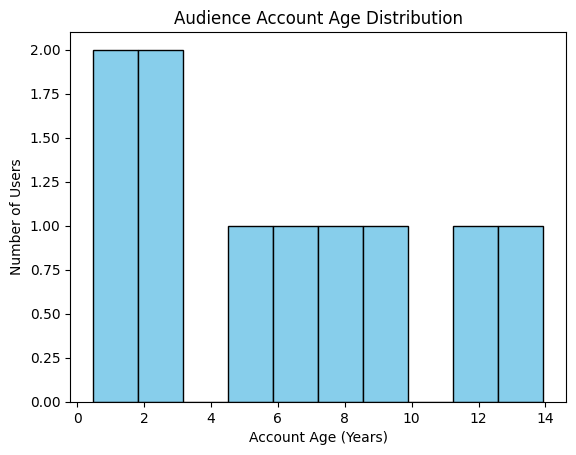

In [ ]:
import matplotlib.pyplot as plt

# Plot account age distribution
plt.hist(audience_df["account_age"], bins=10, color='skyblue', edgecolor='black')
plt.title("Audience Account Age Distribution")
plt.xlabel("Account Age (Years)")
plt.ylabel("Number of Users")
plt.show()


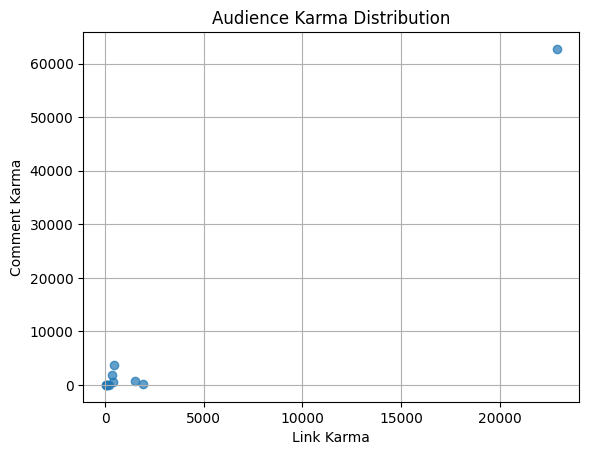

In [ ]:
plt.scatter(audience_df["link_karma"], audience_df["comment_karma"], alpha=0.7)
plt.title("Audience Karma Distribution")
plt.xlabel("Link Karma")
plt.ylabel("Comment Karma")
plt.grid(True)
plt.show()


In [ ]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 influential users
top_users = sorted_degree[:10]

# Prepare data for plotting
users = [user for user, _ in top_users]
centrality_values = [centrality for _, centrality in top_users]


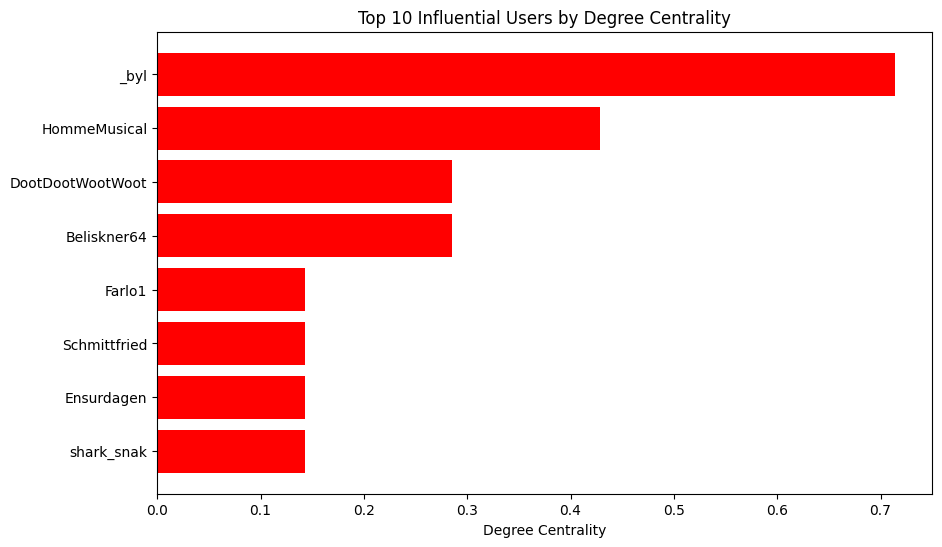

In [ ]:
import matplotlib.pyplot as plt

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(users, centrality_values, color='red')

# Add labels and title
plt.xlabel('Degree Centrality')
plt.title('Top 10 Influential Users by Degree Centrality')
plt.gca().invert_yaxis()  # Invert y-axis to show the most influential at the top

# Show the plot
plt.show()
